In [1]:
import pandas as pd
import numpy as np
import duckdb as duckdb
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

from dotenv import load_dotenv
import os
import sys
load_dotenv()
sys.path.append(os.getenv('MODULE_PATH_data_preprocessing'))

import st00_add_fixture_ao_banco as st00

In [2]:
caminho = os.getenv('MODULE_PATH_DATA') + 'futebol.db'
SoccerPipeline = st00.SoccerPipeline(caminho)

df = SoccerPipeline.query_execute('SELECT * FROM fixture')

In [3]:
condicoes = [
    df['goals_home'] > df['goals_away'],
    df['goals_home'] == df['goals_away'],
    df['goals_home'] < df['goals_away'],
]

resultados = [
    0,1,2
]

df['resultado'] = np.select(condicoes, resultados, default= 99)

df = df[df['resultado'] != 99]

# Dicionário de mapeamento
country_translation = {
    'England': 'Inglaterra',
    'Spain': 'Espanha',
    'France': 'França',
    'Brazil': 'Brasil',
    'Germany': 'Alemanha',
    'Italy': 'Itália',
    'Netherlands': 'Holanda',
    'Argentina': 'Argentina',
    'Portugal': 'Portugal',
    'Belgium': 'Bélgica'
}

# Substituir os nomes dos países
df['league_country'] = df['league_country'].replace(country_translation)


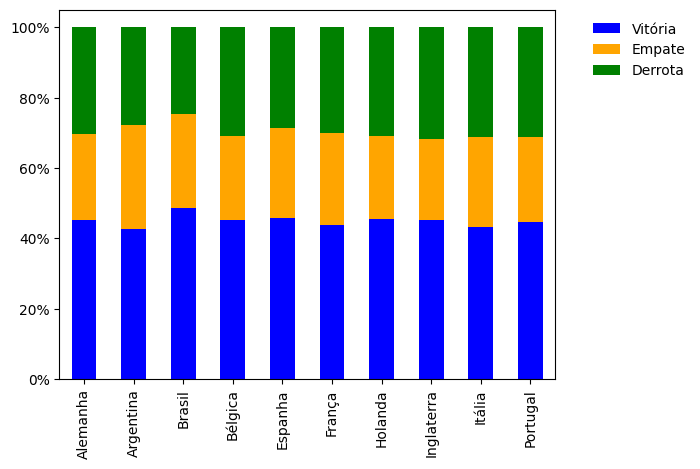

In [4]:
# Calcular as porcentagens
grouped = df.groupby(['league_country', 'resultado']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Multiplicar por 100 para obter porcentagens

# Plotar o gráfico de barras empilhadas
ax = percentages.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])

# Adicionar rótulos e título
# ax.set_ylabel('Porcentagem')
# ax.set_title('Distribuição dos resultados por liga')

# Alterar os valores na legenda
new_labels = ['Vitória', 'Empate', 'Derrota']
ax.legend(new_labels, bbox_to_anchor=(1.05, 1), loc='upper left', shadow=False, fancybox=False, frameon=False)

# Remover rótulo do eixo x
ax.set_xlabel('')

# Formatar o eixo y como porcentagens
ax.yaxis.set_major_formatter(PercentFormatter())

# Mostrar o gráfico
plt.show()
